# HW3 Support Vector Machine and Decision Trees

# Due on 11/30 23:59 pm

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [234]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load from file
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [235]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

Type your code here

In [236]:
#import the model 
from sklearn import svm
from sklearn.model_selection import train_test_split
#model = svm.SVC()
model = svm.SVC(kernel = 'linear')
# Train test split
xTrain, xTest, yTrain, yTest = train_test_split(df.drop('had_affair',axis=1),
df['had_affair'], test_size=0.20, random_state=101)
model.fit(xTrain, yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [237]:
#print out 
prediction = model.predict(xTest)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))


             precision    recall  f1-score   support

          0       0.72      0.93      0.81       850
          1       0.64      0.27      0.38       424

avg / total       0.69      0.71      0.67      1274

0.707221350078


### Question 2. Now try different value of C-parameter and rerun your model

Type your code here

In [238]:
# Try C = 2**-5 and 2**5
model = svm.SVC(kernel = 'linear', C=2**-5)
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.71      0.93      0.81       850
          1       0.64      0.25      0.36       424

avg / total       0.69      0.70      0.66      1274

0.704866562009


In [239]:
model = svm.SVC(kernel = 'linear', C=2**5)
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.72      0.92      0.81       850
          1       0.64      0.27      0.38       424

avg / total       0.69      0.71      0.66      1274

0.705651491366


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [240]:
model = svm.SVC(kernel = 'rbf',C=1, gamma=2**-5)
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.73      0.91      0.81       850
          1       0.64      0.31      0.42       424

avg / total       0.70      0.71      0.68      1274

0.71114599686


In [241]:
model = svm.SVC(kernel = 'rbf',C=1, gamma= 2**0.1)
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.69      0.87      0.77       850
          1       0.47      0.24      0.31       424

avg / total       0.62      0.66      0.62      1274

0.656200941915


In [242]:
model = svm.SVC(kernel = 'rbf',C=1, gamma= 1)
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.70      0.87      0.77       850
          1       0.47      0.24      0.32       424

avg / total       0.62      0.66      0.62      1274

0.657770800628


In [243]:
model = svm.SVC(kernel = 'rbf',C=1, gamma= 2)
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.68      0.88      0.77       850
          1       0.40      0.16      0.23       424

avg / total       0.59      0.64      0.59      1274

0.642072213501


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

In [244]:
# It seems when i use rbf, set c = 1 provides the best looking results. 
#Specfically( kernel = 'rbf', c = 1, gamma=2**-5)

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

Type your code here

In [245]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [246]:
model.fit(xTrain,yTrain)
prediction = model.predict(xTest)

In [247]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.71      0.76      0.73       850
          1       0.44      0.38      0.41       424

avg / total       0.62      0.63      0.63      1274

0.634222919937


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [248]:
#Gini max depth = 2 
model_Gini_2 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model_Gini_2.fit(xTrain, yTrain)
prediction = model_Gini_2.predict(xTest)

In [249]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.73      0.90      0.80       850
          1       0.61      0.32      0.42       424

avg / total       0.69      0.71      0.67      1274

0.705651491366


In [250]:
#Entropy max depth = 2
model_Entropy_2 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model_Entropy_2.fit(xTrain, yTrain)
prediction = model_Entropy_2.predict(xTest)

In [251]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.73      0.90      0.80       850
          1       0.61      0.32      0.42       424

avg / total       0.69      0.71      0.67      1274

0.705651491366


In [252]:
#Gini max depth = 3 
model_Gini_3 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model_Gini_3.fit(xTrain, yTrain)
prediction = model_Gini_3.predict(xTest)

In [253]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.73      0.86      0.79       850
          1       0.56      0.35      0.43       424

avg / total       0.67      0.69      0.67      1274

0.691522762951


In [254]:
#Entropy max depth = 3
model_Entropy_3 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model_Entropy_3.fit(xTrain, yTrain)
prediction = model_Entropy_3.predict(xTest)

In [255]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.73      0.86      0.79       850
          1       0.56      0.35      0.43       424

avg / total       0.67      0.69      0.67      1274

0.691522762951


In [256]:
#Gini max depth = 4 
model_Gini_4 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model_Gini_4.fit(xTrain, yTrain)
prediction = model_Gini_4.predict(xTest)

In [257]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.72      0.90      0.80       850
          1       0.60      0.32      0.41       424

avg / total       0.68      0.70      0.67      1274

0.70251177394


In [258]:
#Entropy max depth = 4
model_Entropy_4 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model_Entropy_4.fit(xTrain, yTrain)
prediction = model_Entropy_4.predict(xTest)

In [259]:
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.72      0.90      0.80       850
          1       0.60      0.32      0.41       424

avg / total       0.68      0.70      0.67      1274

0.70251177394


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

 Both gini and entropy give very similar answers. using diffrent criterion's doesnt seem to change the results to a noticable degree. i wrote them (gini and entropy) side by side just to see if there would be noticable diffrences, and it wasent impressioable. a max depth of 2 for gini was i think the best in terms of accuracy. 

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [260]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'had_affair', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'],
      dtype='object')

In [261]:

features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair']

In [262]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

# Pick up all featurs columns from your data frame
features = list(df.drop(['had_affair'],axis=1).columns)
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

Type your code here

In [263]:
# Hint 
model_Gini_2 = DecisionTreeClassifier(max_depth=2, criterion='gini')
model_Gini_2.fit(xTrain, yTrain)
model_Gini_3 = DecisionTreeClassifier(max_depth=3, criterion='gini')
model_Gini_3.fit(xTrain, yTrain)
model_Gini_4 = DecisionTreeClassifier(max_depth=4, criterion='gini')
model_Gini_4.fit(xTrain, yTrain)
# Then display all 3 trees
#ill use gini from above

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

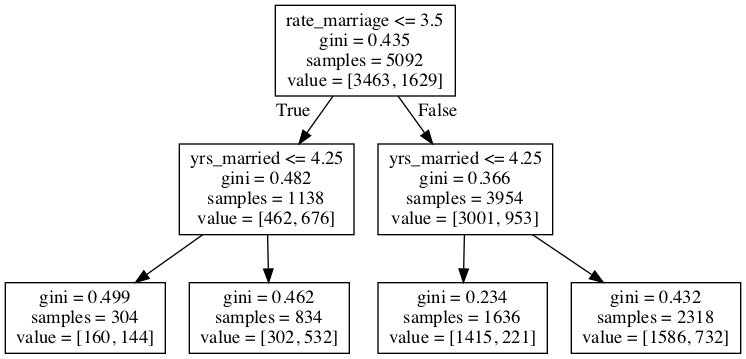

In [264]:
# max =  2,  gini
dot_data = StringIO()  
export_graphviz(model_Gini_2, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

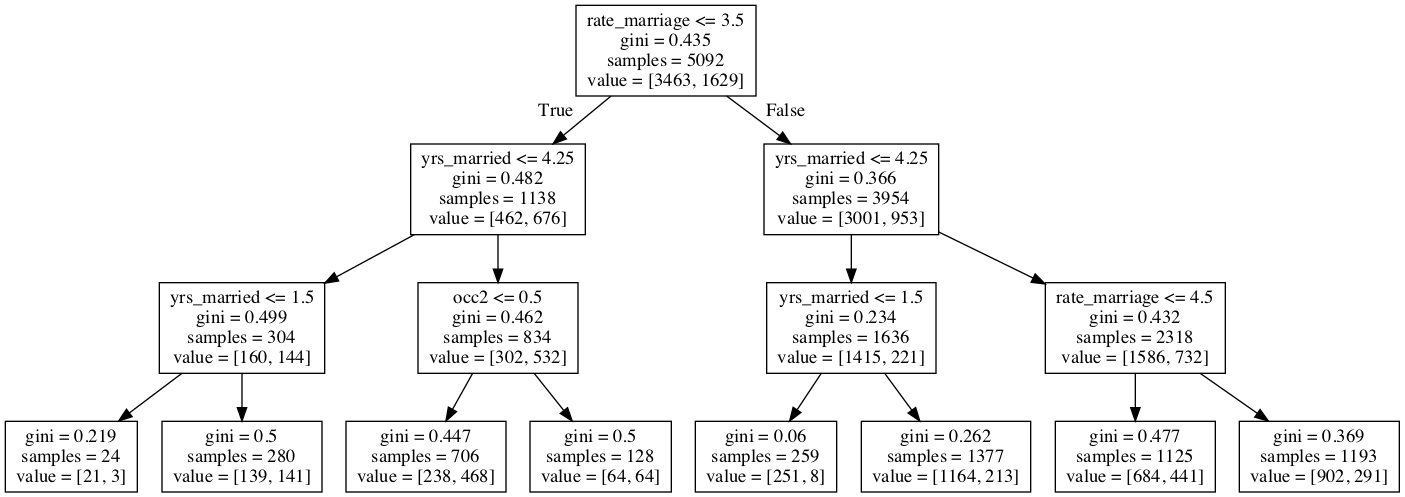

In [265]:
# max =  3,  gini
dot_data = StringIO()  
export_graphviz(model_Gini_3, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

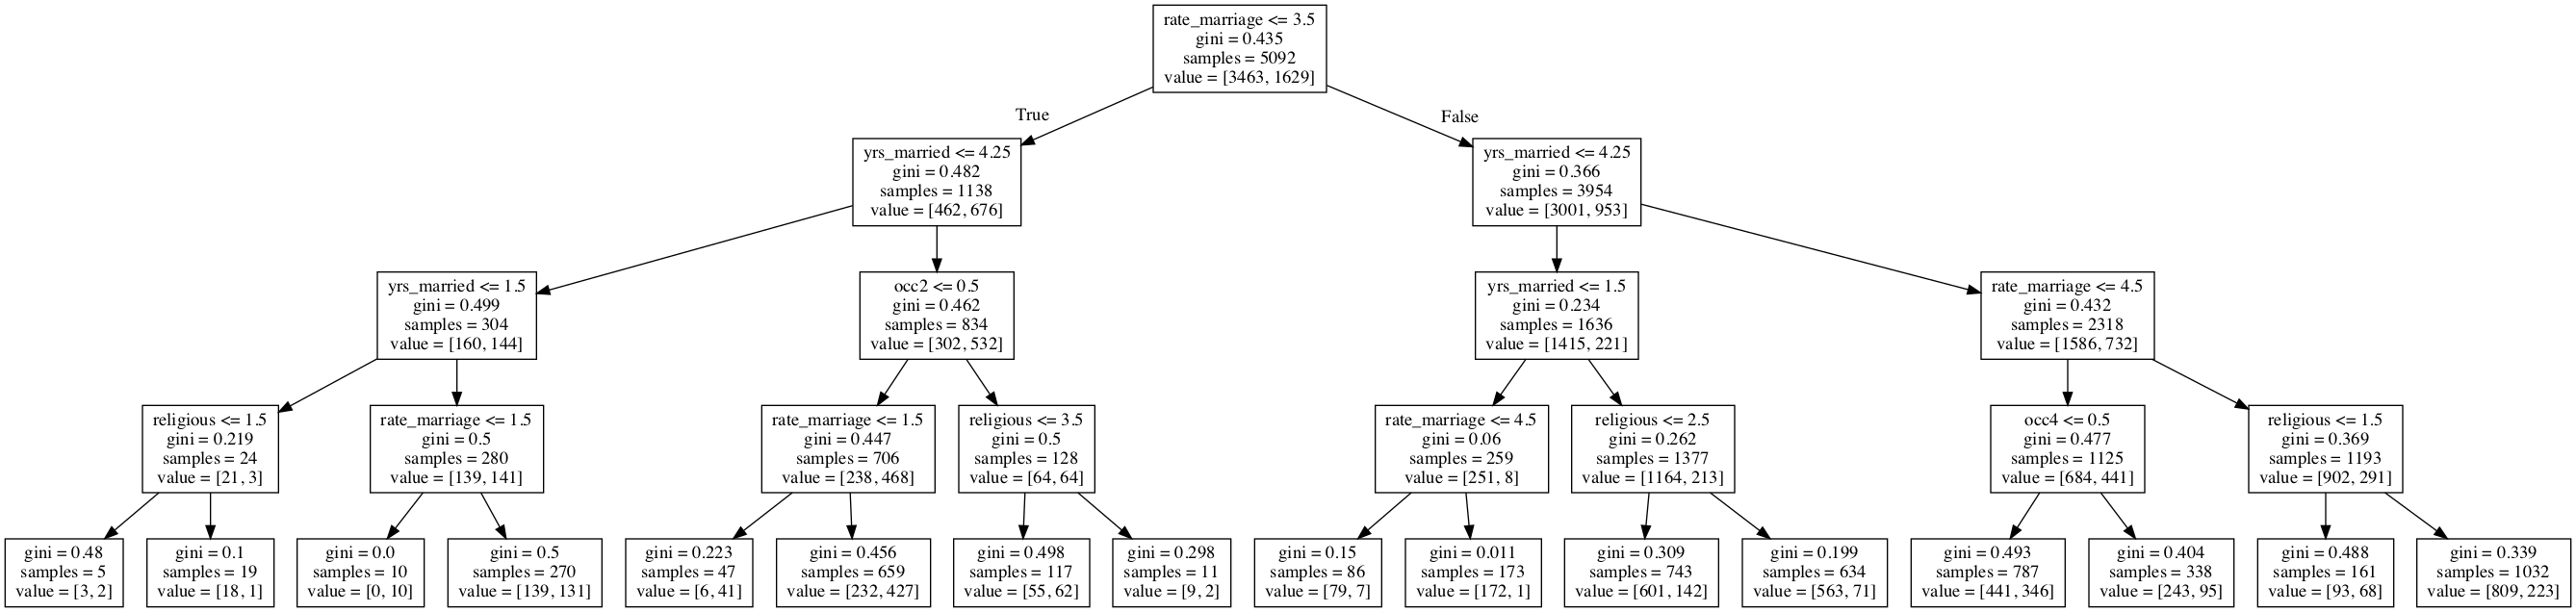

In [266]:
# max =  4,  gini
dot_data = StringIO()  
export_graphviz(model_Gini_4, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [267]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [268]:
#perfromance check
print(classification_report(yTest,prediction))
print(accuracy_score(yTest, prediction))

             precision    recall  f1-score   support

          0       0.72      0.90      0.80       850
          1       0.60      0.32      0.41       424

avg / total       0.68      0.70      0.67      1274

0.70251177394
